In [1]:
import pandas as pd
from geodata_berlin import LookupTableManager
import matplotlib.pyplot as plt
import seaborn as sns # for "vlag" color scheme

In [2]:
df = pd.read_csv('geodata_berlin/data/local_districts/population_age_gender_Berlin_local_districts_20231231.csv')
df

,local_district_name,total,< 6,6 - 14,15 - 17,18 - 26,27 - 44,45 - 54,55 - 64,65 <=,female_share
0,Mitte,107875,5873,7533,2253,10880,41003,14672,11923,13738,53117
1,Moabit,84113,4471,5726,1825,10639,31859,9345,9583,10665,40155
2,Hansaviertel,6075,194,286,75,995,1928,607,746,1244,2952
3,Tiergarten,16313,789,1066,295,2065,5826,1874,1939,2459,7685
4,Wedding,86926,4567,5876,1984,11714,31915,9590,9882,11398,42129
...,...,...,...,...,...,...,...,...,...,...,...
92,Waidmannslust,11263,791,1234,405,1155,2560,1324,1474,2320,5708
93,Lübars,5068,206,512,174,351,876,657,912,1380,2572
94,Wittenau,25106,1224,1721,496,2343,5786,2744,4066,6726,12426
95,Märkisches Viertel,41167,2802,4914,1617,4710,9516,4746,4805,8057,21179


In [3]:
ltm = LookupTableManager(resolution_mode='LOCAL_DISTRICTS', map_by='NAME')
result_df = ltm.map_geodata(df, id_col='local_district_name')

# drop "Schlachtensee" because geometry data is outdated
plot_df = result_df.dropna().copy()
plot_df.head(3)

,local_district_name,total,< 6,6 - 14,15 - 17,18 - 26,27 - 44,45 - 54,55 - 64,65 <=,female_share,local_district_id,district_name,geometry,size_km2
0,Mitte,107875,5873,7533,2253,10880,41003,14672,11923,13738,53117,0101,Mitte,"POLYGON ((392575.824 5820829.268, 392588.821 5...",10.673582
1,Moabit,84113,4471,5726,1825,10639,31859,9345,9583,10665,40155,0102,Mitte,"POLYGON ((387289.672 5820143.981, 387286.645 5...",7.705435
2,Hansaviertel,6075,194,286,75,995,1928,607,746,1244,2952,0103,Mitte,"POLYGON ((387576.288 5819673.343, 387574.183 5...",0.528038


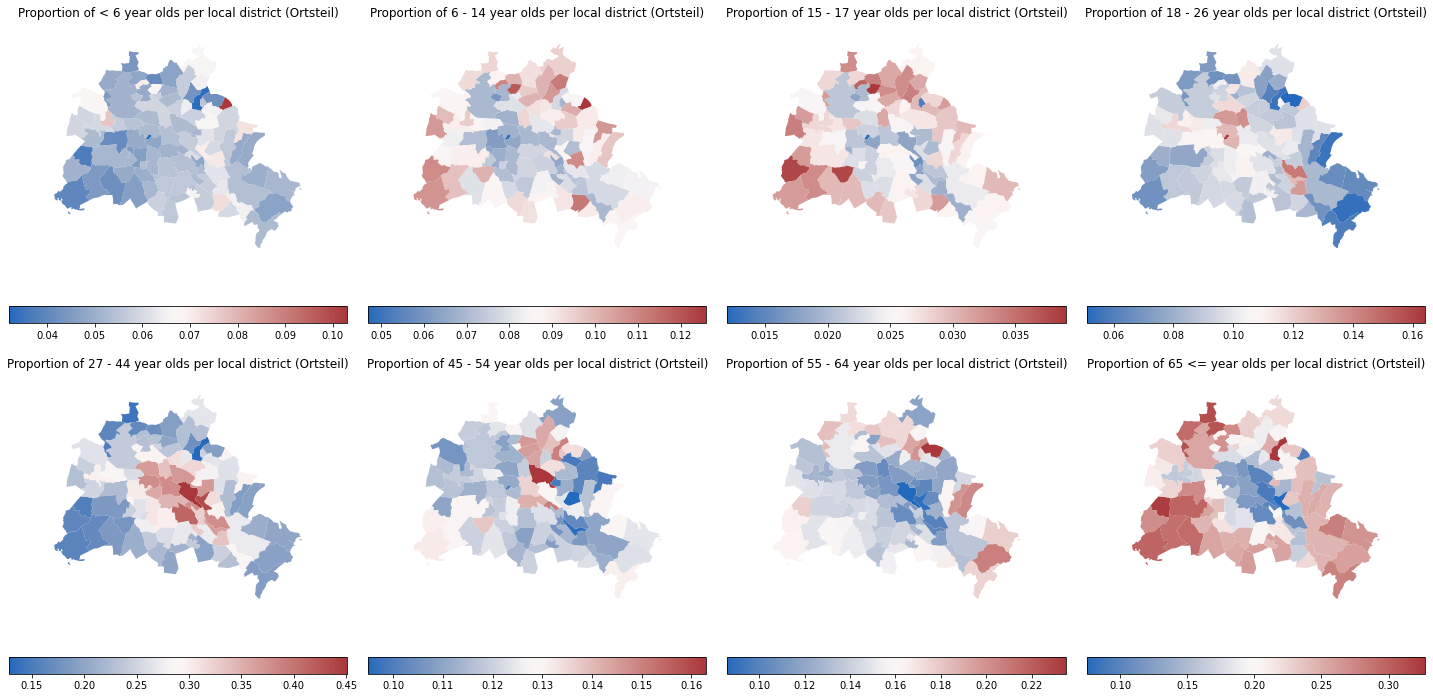

In [15]:
save = False
fig, axs = plt.subplots(2, 4, figsize=(20, 10)) # Creates a grid of 2x4 for 8 subplots
axs = axs.flatten() # Flatten the 2D array of axes to make indexing easier

for i, col in enumerate(plot_df.columns[2:10]):
    plot_df[col] = round(result_df[col] / result_df['total'], 3)

    # Plot on the ith subplot
    plot_df.plot(column=col, cmap='vlag', legend=True, ax=axs[i], legend_kwds={"orientation": "horizontal"})
    axs[i].set_title(f"Proportion of {col} year olds per local district (Ortsteil)")
    axs[i].set_axis_off()

# Adjust the layout so titles and legends do not overlap
plt.tight_layout()

if save:
    # Save the figure
    plt.savefig(f"usecase_example_results/combined_proportions.png", bbox_inches='tight')
    plt.close()
else:
    plt.show()